[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LiveCoronaDetector/livecod/blob/master/finance/finance.ipynb)


# Financial Analysis

본 노트북은 [Live Corona Map](https://github.com/LiveCoronaDetector/livecod/) 프로젝트에 향후 추가할 계획인 금융 분석 시각화를 위해 만들어졌습니다.


# Setup

필요한 모듈을 임포트해옵니다. (프로젝트의 진행에 따라 추가, 변경될 수 있습니다.)

In [0]:
!pip install --quiet yfinance

In [0]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('ggplot')

# Fetch Data

## Financial Data

`yfinance` API를 이용해 데이터셋을 구축합니다.

In [0]:
TICKERS = ["^KS11", "^GSPC", "^N225", "^HSI", "^N100", "^FTSE"] 
START = datetime(2019, 12, 1)

In [0]:
def get_financial_data(tickers, start, end=datetime.today()):
    raw_data = yf.download(tickers, start, end)
    df = raw_data.loc[:, 'Adj Close']
    df.reset_index(inplace=True)
    df.columns = df.columns.str.replace('^', '')
    df.set_index('Date', inplace=True)
    return df

In [6]:
data = get_financial_data(TICKERS, START)

[*********************100%***********************]  6 of 6 completed


In [7]:
data.tail()

,FTSE,GSPC,HSI,KS11,N100,N225
Date,,,,,,
2020-04-10,NaN,NaN,NaN,1860.699951,NaN,19498.500000
2020-04-13,NaN,2761.629883,NaN,1825.760010,NaN,19043.400391
2020-04-14,5791.299805,2846.060059,24435.400391,1857.079956,888.890015,19638.810547
2020-04-15,5597.700195,2783.360107,24145.339844,NaN,857.039978,19550.089844
2020-04-16,NaN,NaN,NaN,1836.699951,NaN,19212.179688


In [0]:
data_drop = data.dropna()
data_fill = data.fillna(method='ffill')

## COVID Data

코로나 바이러스 관련 데이터셋을 구축합니다.

<!-- TODO -->

In [0]:
def get_covid_data(url):
  df = pd.read_csv(url)
  df.Date = pd.to_datetime(df.Date)
  try:
    df.set_index(['Country', 'Date'], inplace=True)
    df.sort_index(inplace=True)
  except KeyError:
    df.set_index('Date', inplace=True)
  return df

In [10]:
covid_agg = get_covid_data('https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv')
covid_agg.head()

,Confirmed,Recovered,Deaths,Increase rate
Date,,,,
2020-01-22,555,28,17,NaN
2020-01-23,654,30,18,17.837838
2020-01-24,941,36,26,43.883792
2020-01-25,1434,39,42,52.391073
2020-01-26,2118,52,56,47.698745


In [11]:
covid_countries = get_covid_data('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')
covid_countries

Confirmed  Recovered  Deaths
Country     Date                                    
Afghanistan 2020-01-22          0          0       0
            2020-01-23          0          0       0
            2020-01-24          0          0       0
            2020-01-25          0          0       0
            2020-01-26          0          0       0
...                           ...        ...     ...
Zimbabwe    2020-04-10         13          0       3
            2020-04-11         14          0       3
            2020-04-12         14          0       3
            2020-04-13         17          0       3
            2020-04-14         17          0       3

[15540 rows x 3 columns]

In [12]:
covid_korea = covid_countries.loc['Korea, South', :]
covid_korea

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,3,0,0
...,...,...,...
2020-04-10,10450,7117,208
2020-04-11,10480,7243,211
2020-04-12,10512,7368,214


# Plot Data

## Preprocessing

로그 변화율을 그래프로 나타냅니다. 로그 변화율을 위한 공식은 다음과 같습니다:

$$
\text{log diff} = \log \left( \frac{x_{t+1}}{x_t} \right)
$$


In [0]:
def log_diff(data):
    return data.apply(lambda x: np.log(x / x.shift(1)))

데이터를 정규화하기 위한 함수입니다. 각 항목의 값에서 열의 평균을 차감합니다.

In [0]:
def standardize(data):
  return data.apply(lambda x: (x - x.mean())/(x.max() - x.min()))

## Visualizations

다양한 시긱화를 시도해봅니다. 먼저 지표의 로그 변화율을 살펴봅니다.

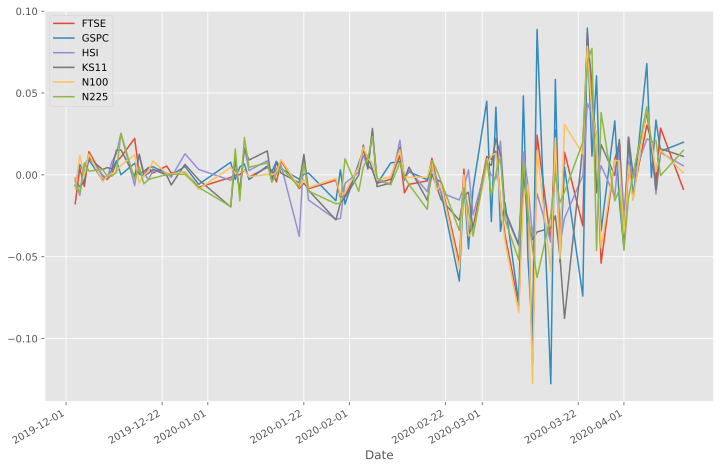

In [15]:
log_diff(data_drop).plot()
plt.show()

다음은 정규화한 지표값의 추이를 보겠습니다.

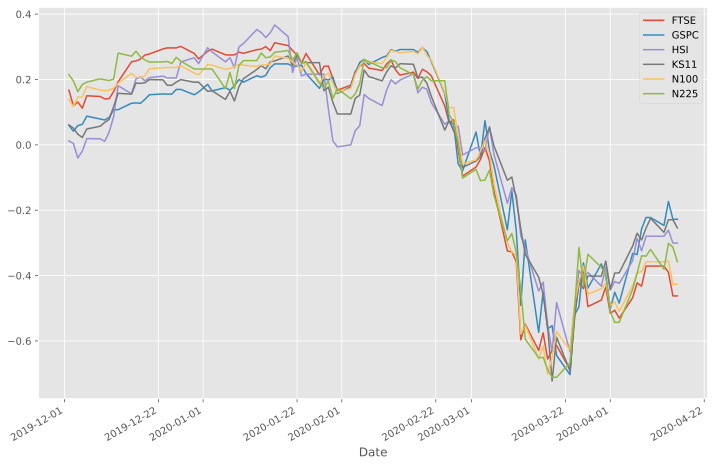

In [16]:
standardize(data_fill).plot()
plt.show()

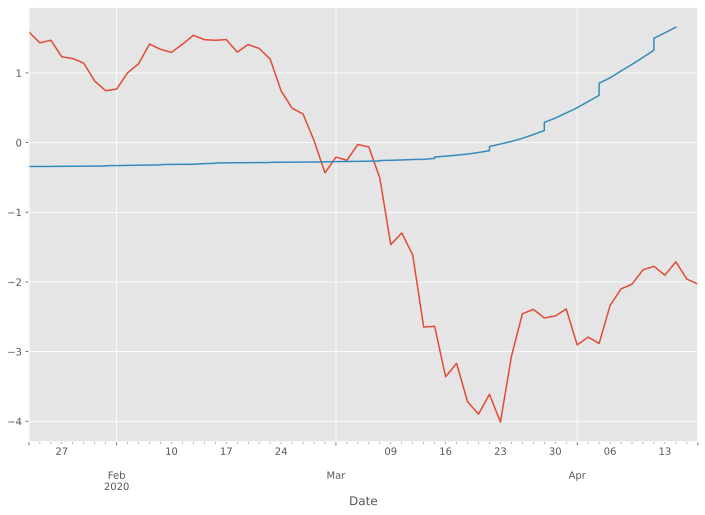

In [17]:
ax = standardize(data_fill)['2020-01-22':].sum(axis=1).plot()
standardize(covid_agg[['Confirmed','Deaths']]).sum(axis=1).plot(ax=ax)
plt.show()